In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(0.26280896477022964, 14.331275676830927),
 (-65.75450267196914, -68.51317465398748),
 (-76.97686573793659, -91.96032429763068),
 (34.643089273736436, -51.13724994841377),
 (87.33932552106191, 79.91179531600943),
 (-74.30685564106764, 20.67067614243436),
 (-13.2920952675493, 90.54128767832276),
 (-12.957312383475696, -124.54074860083186),
 (36.86019739552512, 25.061832101789975),
 (49.3960176726888, -106.25450821047963),
 (20.882233786453924, 176.3598493874456),
 (3.867670710583482, -102.61252437737909),
 (-33.60304742516977, 15.567903914374028),
 (-28.83003534264168, -94.20298997224833),
 (-81.26880932056167, -170.3430089241743),
 (3.83641551464936, 65.30451265032369),
 (-50.092456033151386, 158.68707612382025),
 (-39.11331681781952, -65.49971736081855),
 (-17.4283090496006, -127.36302011616442),
 (-12.096127610038437, 134.44674136927546),
 (-0.687834958210729, -48.958475788115095),
 (80.74955527432624, 94.0239559235996),
 (-11.545407955843757, -59.919270815445444),
 (53.380181059983

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [56]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | okandja
City not found. Skipping...
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | torbay
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | bengkulu
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | paros
Processing Record 10 of Set 1 | assiniboia
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | saldanha
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | mahibadhoo
Processing Record 17 of Set 1 | tuatapere
Processing Record 18 of Set 1 | general roca
Processing Record 19 of Set 1 | maningrida
Processing Record 20 of Set 1 | soure
Processing Record 21 of Set 1 | khatanga
Processing Record 22 of Set 1 | vilhena
Processing Record

Processing Record 39 of Set 4 | isla vista
Processing Record 40 of Set 4 | hailar
Processing Record 41 of Set 4 | soe
Processing Record 42 of Set 4 | cordoba
Processing Record 43 of Set 4 | airai
Processing Record 44 of Set 4 | katsuura
Processing Record 45 of Set 4 | chateau-gontier
Processing Record 46 of Set 4 | lodwar
Processing Record 47 of Set 4 | erzin
Processing Record 48 of Set 4 | uk
City not found. Skipping...
Processing Record 49 of Set 4 | solnechnyy
Processing Record 50 of Set 4 | verkhnevilyuysk
Processing Record 1 of Set 5 | santa isabel do rio negro
Processing Record 2 of Set 5 | cockburn town
Processing Record 3 of Set 5 | yumen
Processing Record 4 of Set 5 | margate
Processing Record 5 of Set 5 | bandarbeyla
Processing Record 6 of Set 5 | longyearbyen
Processing Record 7 of Set 5 | cabedelo
Processing Record 8 of Set 5 | parakai
Processing Record 9 of Set 5 | kovur
Processing Record 10 of Set 5 | bindura
Processing Record 11 of Set 5 | tumannyy
City not found. Skippi

Processing Record 29 of Set 8 | beringovskiy
Processing Record 30 of Set 8 | karratha
Processing Record 31 of Set 8 | nantucket
Processing Record 32 of Set 8 | zaterechnyy
Processing Record 33 of Set 8 | iracoubo
Processing Record 34 of Set 8 | sakakah
Processing Record 35 of Set 8 | taitung
Processing Record 36 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 37 of Set 8 | wakkanai
Processing Record 38 of Set 8 | angoche
Processing Record 39 of Set 8 | santa marta
Processing Record 40 of Set 8 | ilulissat
Processing Record 41 of Set 8 | guerrero negro
Processing Record 42 of Set 8 | obidos
Processing Record 43 of Set 8 | sfantu gheorghe
Processing Record 44 of Set 8 | buta
Processing Record 45 of Set 8 | nova olimpia
Processing Record 46 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 47 of Set 8 | chum phae
Processing Record 48 of Set 8 | berlevag
Processing Record 49 of Set 8 | tosya
Processing Record 50 of Set 8 | kahului
Processing Record 

Processing Record 14 of Set 12 | biltine
Processing Record 15 of Set 12 | petropavl
Processing Record 16 of Set 12 | te anau
Processing Record 17 of Set 12 | hakkari
Processing Record 18 of Set 12 | kenai
Processing Record 19 of Set 12 | katha
City not found. Skipping...
Processing Record 20 of Set 12 | atkinson
Processing Record 21 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 22 of Set 12 | san vicente
Processing Record 23 of Set 12 | fonte boa
Processing Record 24 of Set 12 | aguimes
Processing Record 25 of Set 12 | eureka
Processing Record 26 of Set 12 | djenne
Processing Record 27 of Set 12 | sangar
Processing Record 28 of Set 12 | warmbad
Processing Record 29 of Set 12 | umm lajj
Processing Record 30 of Set 12 | mont-de-marsan
Processing Record 31 of Set 12 | yatou
Processing Record 32 of Set 12 | zabaykalsk
Processing Record 33 of Set 12 | caravelas
Processing Record 34 of Set 12 | deer lake
Processing Record 35 of Set 12 | iquique
Processing Record 36 of 

In [10]:
print(len(city_data))

572


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,53.26,47,40,13.80,AR,2021-12-01 17:20:58
1,Punta Arenas,-53.1500,-70.9167,55.51,38,40,23.02,CL,2021-12-01 17:12:16
2,Torbay,47.6666,-52.7314,42.67,70,75,16.11,CA,2021-12-01 17:20:59
3,Dikson,73.5069,80.5464,-8.41,97,100,16.08,RU,2021-12-01 17:12:04
4,Bredasdorp,-34.5322,20.0403,63.28,68,94,12.39,ZA,2021-12-01 17:20:59
5,Bengkulu,-3.8004,102.2655,74.91,87,65,3.62,ID,2021-12-01 17:20:59
6,Rikitea,-23.1203,-134.9692,76.03,70,1,19.30,PF,2021-12-01 17:21:00
7,Paros,37.0833,25.1500,58.59,51,0,8.05,GR,2021-12-01 17:21:00
8,Assiniboia,49.6334,-105.9845,46.31,57,84,18.41,CA,2021-12-01 17:21:01
9,Butaritari,3.0707,172.7902,81.18,76,80,9.51,KI,2021-12-01 17:21:01


In [12]:
#reorder the columns
new_column_order = ['City', 'Country', 'Date','Lat','Lng', 'Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-12-01 17:20:58,-54.8000,-68.3000,53.26,47,40,13.80
1,Punta Arenas,CL,2021-12-01 17:12:16,-53.1500,-70.9167,55.51,38,40,23.02
2,Torbay,CA,2021-12-01 17:20:59,47.6666,-52.7314,42.67,70,75,16.11
3,Dikson,RU,2021-12-01 17:12:04,73.5069,80.5464,-8.41,97,100,16.08
4,Bredasdorp,ZA,2021-12-01 17:20:59,-34.5322,20.0403,63.28,68,94,12.39


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1638383964.727492

In [16]:
today = time.strftime("%x")
today

'12/01/21'

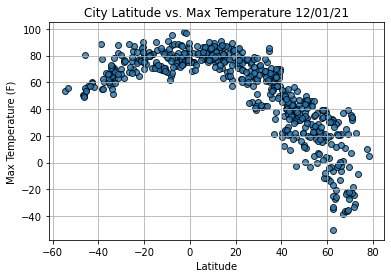

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

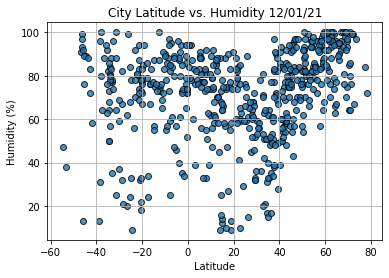

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

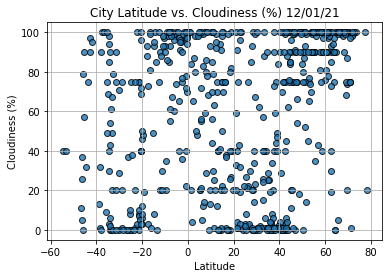

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

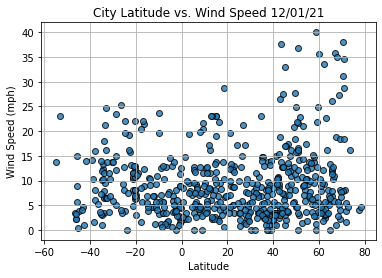

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                        Vaini
Country                        TO
Date          2021-12-01 17:21:02
Lat                         -21.2
Lng                        -175.2
Max Temp                    77.16
Humidity                       83
Cloudiness                     75
Wind Speed                   8.05
Name: 13, dtype: object

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Torbay,CA,2021-12-01 17:20:59,47.6666,-52.7314,42.67,70,75,16.11
3,Dikson,RU,2021-12-01 17:12:04,73.5069,80.5464,-8.41,97,100,16.08
7,Paros,GR,2021-12-01 17:21:00,37.0833,25.1500,58.59,51,0,8.05
8,Assiniboia,CA,2021-12-01 17:21:01,49.6334,-105.9845,46.31,57,84,18.41
9,Butaritari,KI,2021-12-01 17:21:01,3.0707,172.7902,81.18,76,80,9.51


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

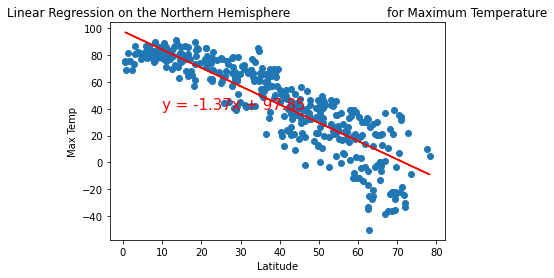

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

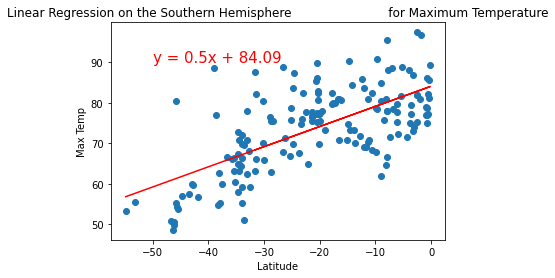

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


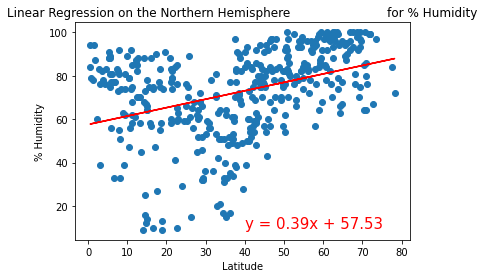

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

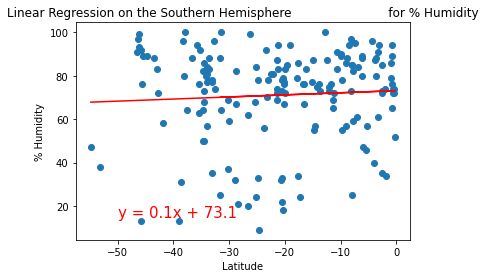

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

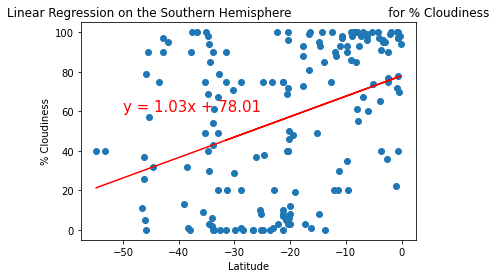

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

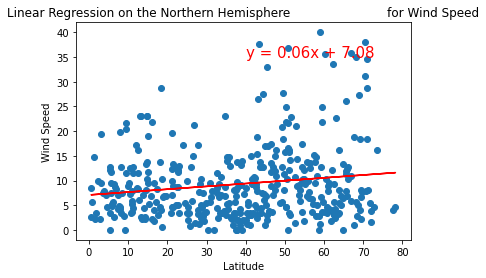

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

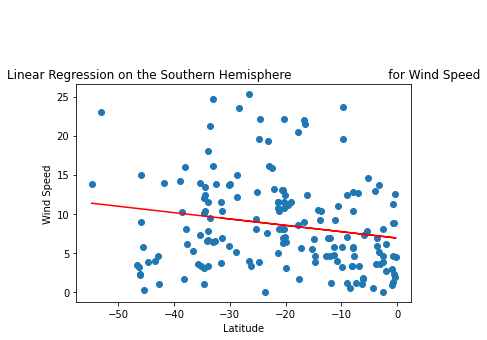

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))